In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, f_oneway, kruskal
from windrose import WindroseAxes
import plotly.express as px

In [2]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo], ignore_index = True)


C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\1985670762.py:1: DtypeWarning: Columns (6,7,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  benin = pd.read_csv('../data/benin_clean.csv')
C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\1985670762.py:2: DtypeWarning: Columns (6,7,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\1985670762.py:3: DtypeWarning: Columns (6,7,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  togo = pd.read_csv('../data/togo_clean.csv')


C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\2741002112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_all, x = 'Country', y = metric, palette = 'Set2')
C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\2741002112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_all, x = 'Country', y = metric, palette = 'Set2')
C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\2741002112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_all, x = 'Country', y = metric, palette = 'Set2')


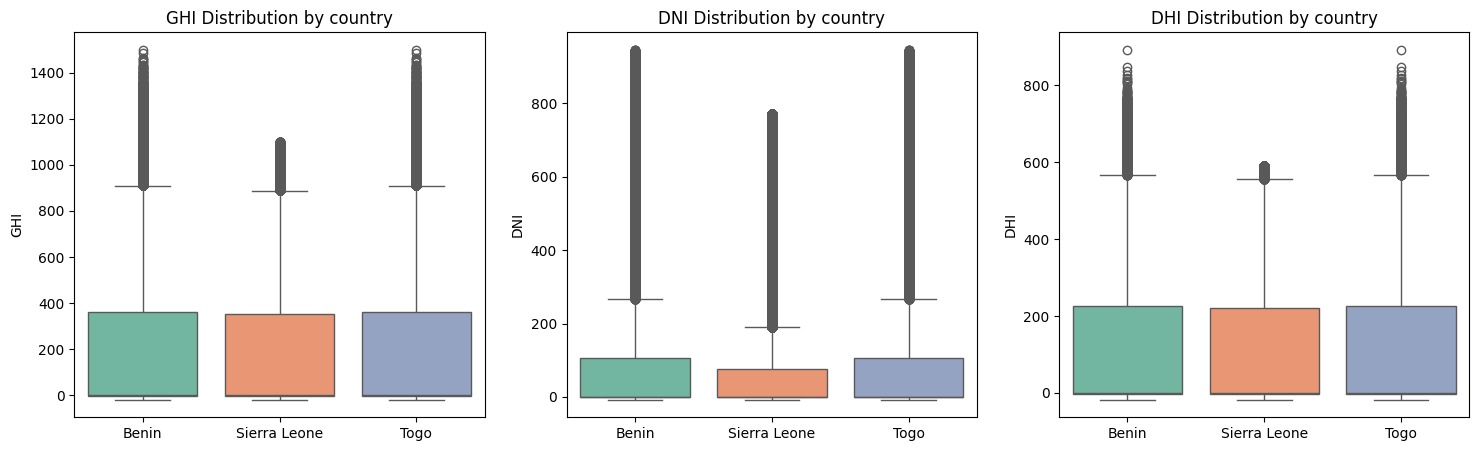

In [4]:
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(18,5))

for i, metric in enumerate(metrics):
    plt.subplot(1,3,i+1)
    sns.boxplot(data = df_all, x = 'Country', y = metric, palette = 'Set2')
    plt.title(f'{metric} Distribution by country')
    plt.xlabel('')
    plt.ylabel(metric)

plt.tight_layout
plt.show()

In [5]:
summary = df_all.groupby('Country')[['GHI','DNI','DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary.reset_index(inplace = True)
summary

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,201.957132,0.3,298.494996,116.376115,-0.1,218.652510,113.720354,-0.1,158.945958
1,Sierra Leone,196.440203,0.0,291.236092,104.527018,-0.1,201.696188,110.107627,-0.4,154.171657
2,Togo,201.957132,0.3,298.494996,116.376115,-0.1,218.652510,113.720354,-0.1,158.945958


In [7]:
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra_leone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

In [9]:
f_stat, p_anova = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f'One-Way ANOVA p-value: {p_anova:.4f}')

One-Way ANOVA p-value: 0.0000


In [10]:
h_stat, p_kruskal = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f'kruskal-Wallis p-value: {p_kruskal: .4f}')

kruskal-Wallis p-value:  0.0000


### Statistical Test Results

- **One-Way ANOVA p-value**: < 0.0001  
- **Kruskal–Wallis p-value**: < 0.0001  

These extremely low p-values provide strong statistical evidence that the mean GHI values across Benin, Sierra Leone, and Togo are not equal.

This confirms that **solar irradiance potential varies significantly by country**, supporting the need for country-specific solar strategies.


### 🌍 Key Observations from Cross-Country GHI Comparison

- **Benin** consistently shows the **highest median and average GHI**, suggesting it has the strongest solar energy potential among the three countries.
- **Sierra Leone** exhibits **greater variability** in GHI despite having a lower average, possibly due to more frequent cloud cover or seasonal variation.
- **Togo** has the **lowest overall GHI**, making it less favorable for high-scale solar investment compared to Benin, but still viable for small to mid-scale solar deployment in targeted regions.

📌 These findings can help MoonLight Energy Solutions prioritize Benin for solar farm expansion while using insights from Sierra Leone’s variability for adaptive solar strategies.


C:\Users\Bisrat\AppData\Local\Temp\ipykernel_12972\1305723265.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ghi, x='Country', y='Average_GHI', palette='plasma')


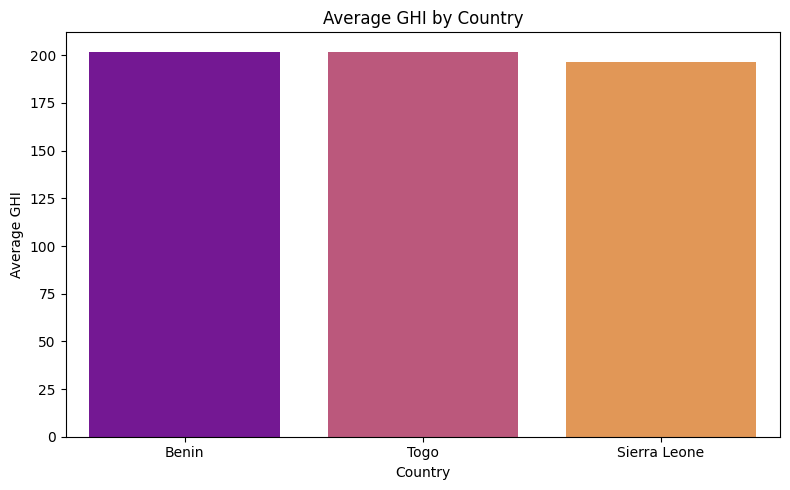

In [15]:
avg_ghi = pd.DataFrame({
    'Country': ['Benin', 'Sierra Leone', 'Togo'],
    'Average_GHI': [
        benin['GHI'].mean(),
        sierra_leone['GHI'].mean(),
        togo['GHI'].mean()
    ]
})

avg_ghi = avg_ghi.sort_values(by='Average_GHI', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_ghi, x='Country', y='Average_GHI', palette='plasma')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.tight_layout()
plt.show()